# CSI 5810 Assignment 5

## Samantha Bracellari

### Problem 1 - A-priori

In [ ]:
# import libs
import numpy as np

# step 0: define our 'daatabase'
data = np.array([
    [1, [A, B, D, E]],
    [2, [B, C, D]],
    [3, [A, B, D, E]],
    [4, [A, C, D, E]],
    [5, [B, C, D, E]],
    [6, [B, D, E]],
    [7, [C, D]],
    [8, [A, B, C]],
    [9, [A, D, E]],
    [10, [B, D]]
])

# step 1: scan database for each item count
# this generates C1, the list of candidate 1 item sets
C1 = np.array([
    [A, 5],
    [B, 7],
    [C, 5],
    [D, 9],
    [E, 6]
])

# step 2: generate L1 by comparing each count value against
# required minimum of 30%, or 3.
# L1 will thus be the same as C1 since all counts meet this requirement
L1 = C1

# step 3: generate C2, which is all combinations (order doesn't matter) of 
# all item sets
C2 = np.array([
    [A, B],
    [A, C],
    [A, D],
    [A, E],
    [B, C],
    [B, D],
    [B, E],
    [C, D],
    [C, E],
    [D, E]
])

# step 4: generate L2 by comparing the counts of each 2 item set 
# to the minimum support
L2 = np.array([
    [[A, B], 3, 'Y'],
    [[A, C], 2, 'N'],
    [[A, D], 4, 'Y'],
    [[A, E], 4, 'Y'],
    [[B, C], 3, 'Y'],
    [[B, D], 6, 'Y'],
    [[B, E], 4, 'Y'],
    [[C, D], 4, 'Y'],
    [[C, E], 2, 'N'],
    [[D, E], 6, 'Y']
])

# step 5: generate C3 and prune
C3 = np.array([
    [A, B, D],
    [A, B, E],
    [A, D, E],
    [B, C, D],
    [B, D, E]
])

# step 6: generate L3
L3 = np.array([
    [[A, B, D], 2, 'N'],
    [[A, B, E], 2, 'N'],
    [[A, D, E], 4, 'Y'],
    [[B, C, D], 2, 'N'],
    [[B, D, E], 4, 'Y']
])

# the algo terminates. all elements in C4 will be eliminated.
# we are left with [A, D, E] and [B, D, E]

-----

### Problem 2 - Term-Document Matrix

In [1]:
# import libs
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# configs
np.set_printoptions(precision=2)

# define data
F = np.array([
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1]
])

In [2]:
# obtain singular value decomposition
U, s, V = linalg.svd(F)
print('U:' , U)
print('\ns:', s)
print('\nV:', V)

U: [[ 4.40e-01 -2.96e-01 -5.69e-01  5.77e-01 -2.46e-01]
 [ 1.29e-01 -3.31e-01  5.87e-01  1.11e-16 -7.27e-01]
 [ 4.76e-01 -5.11e-01  3.68e-01  1.11e-16  6.14e-01]
 [ 7.03e-01  3.51e-01 -1.55e-01 -5.77e-01 -1.60e-01]
 [ 2.63e-01  6.47e-01  4.15e-01  5.77e-01  8.66e-02]]

s: [2.16 1.59 1.28 1.   0.39]

V: [[ 7.49e-01  2.80e-01  2.04e-01  4.47e-01  3.25e-01  1.21e-01]
 [-2.86e-01 -5.28e-01 -1.86e-01  6.26e-01  2.20e-01  4.06e-01]
 [-2.80e-01  7.49e-01 -4.47e-01  2.04e-01 -1.21e-01  3.25e-01]
 [-5.00e-16  2.22e-16  5.77e-01  1.39e-16 -5.77e-01  5.77e-01]
 [ 5.28e-01 -2.86e-01 -6.26e-01 -1.86e-01 -4.06e-01  2.20e-01]
 [ 1.33e-16 -1.21e-16 -1.33e-16 -5.77e-01  5.77e-01  5.77e-01]]


In [3]:
# reconstruct F
sigma = np.zeros((5, 6))

# ignoring smallest value in s
for i in range(4):
    sigma[i, i] = s[i]

F_ = np.dot(U, np.dot(sigma, V))
print('\nReconstructed F:\n', np.round(F_))


Reconstructed F:
 [[ 1. -0.  1. -0. -0.  0.]
 [ 0.  1. -0. -0. -0.  0.]
 [ 1.  1.  0.  0.  0. -0.]
 [ 1. -0. -0.  1.  1.  0.]
 [-0.  0.  0.  1.  0.  1.]]


In [4]:
# 2 dimensional version of F, U, and V
# first col multiplied by first singular value
# second col multiplied by second singular value
F2D = np.array([F[:, 0]*s[0], F[:, 1]*s[1]]).T
U2D = np.array([U[:, 0]*s[0], U[:, 1]*s[1]]).T
V2D = np.array([V[:, 0]*s[0], V[:, 1]*s[1]]).T

print('\n2D terms:\n', U2D)
print('\n2D documents:\n', V2D)


2D terms:
 [[ 0.95 -0.47]
 [ 0.28 -0.53]
 [ 1.03 -0.81]
 [ 1.52  0.56]
 [ 0.57  1.03]]

2D documents:
 [[ 1.62e+00  4.46e-01]
 [-6.19e-01 -8.43e-01]
 [-6.05e-01  1.19e+00]
 [-1.08e-15  3.54e-16]
 [ 1.14e+00 -4.57e-01]
 [ 2.88e-16 -1.92e-16]]


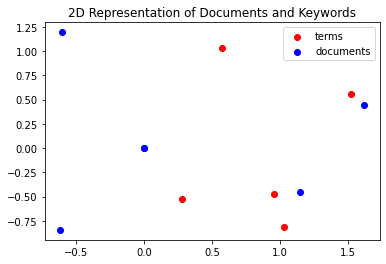

In [5]:
# show representation of documents and keywords in 2D after SVD
plt.scatter(U2D[:, 0], U2D[:, 1], color='red', label='terms')
plt.scatter(V2D[:, 0], V2D[:, 1], color='blue', label='documents')
plt.title('2D Representation of Documents and Keywords')
plt.legend()
plt.show()

In [6]:
# calculate document similarity matrix using cosine similarity measure
similarities = cosine_similarity(F)
print('\nDocument Similarity Matrix:\n', similarities)


Document Similarity Matrix:
 [[1.   0.   0.5  0.41 0.  ]
 [0.   1.   0.71 0.   0.  ]
 [0.5  0.71 1.   0.41 0.  ]
 [0.41 0.   0.41 1.   0.41]
 [0.   0.   0.   0.41 1.  ]]


-----

### Problem 3 - Google Distance & Single Link Clustering

In [ ]:
# import libs
import math
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# the initial 10 words
words = [
    'football', 
    'money', 
    'latitude', 
    'legislature',
    'butterfly',
    'noodles',
    'professor',
    'scissors',
    'mirror',
    'computer'
]

# needed for scraping google
USER_AGENT = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:65.0) Gecko/20100101 Firefox/65.0"
headers = {"user-agent" : USER_AGENT}

In [ ]:
# function to scrape google after a search of a specific word, returns number of
# results for that paricular word
def get_results(word):
    page = requests.get('https://www.google.com/search?q=' + word, headers=headers)
    soup = BeautifulSoup(page.text, "html.parser")
    result = soup.find("div", {"id": "result-stats"}).text
    number = result.split()[1]
    return int(number.replace(',', ''))

In [ ]:
# memoize the words and their number of results
# this is needed because google will block you after making too many requests
def get_word_nums():
  wordnums = {}

  for word in words:
    wordnums[word] = get_results(word)
  return wordnums

In [ ]:
# function to calculate normlized google distance between two words
def ngd(w1, w2):
  fw1 = math.log(wordnums[w1], 2)
  fw2 = math.log(wordnums[w2], 2)
  fw1w2 = math.log(get_results(w1 + " " + w2), 2)
  N = math.log(25270000000,2)

  return (max(fw1, fw2) - fw1w2) / (N - min(fw1, fw2))

In [ ]:
# to get the ngd for each word pair
# returns a 10x10 matrix of normalized google distances
def get_distances():
  distances = [] # array to hold distances
  
  for i in range(10):
    for j in range(10):
      distance = ngd(words[i], words[j])
      distances.append(distance)
  return np.array(distances).reshape(10, 10)

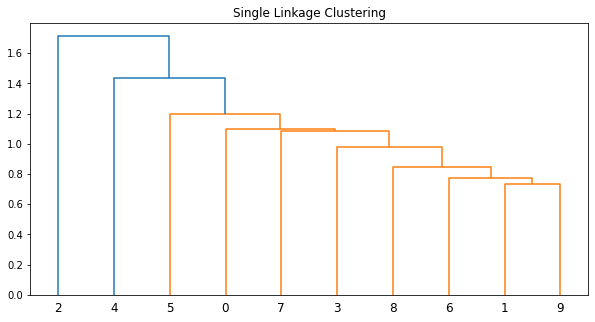

In [30]:
wordnums = get_word_nums() # dict of each word and how many results it has

# grab 10x10 matrix of distances
d = get_distances()

# d
L = linkage(d, 'single')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(L)
plt.title('Single Linkage Clustering')
plt.show()

-----

### Problem 4 - Recommender Systems

In [7]:
import numpy as np

# original data, 0's represent missing spots
M = np.array([
    [5, 2, 4, 4, 3],
    [3, 1, 2, 4, 1],
    [2, 0, 3, 1, 4],
    [2, 5, 4, 3, 5],
    [4, 4, 5, 4, 0]
])

# user matrix
U = np.array([
    [1, 1],
    [1, 1],
    [1, 1],
    [1, 1],
    [1, 1]
])

# item matrix
V = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

# original product matrix
P = np.matmul(U, V)

In [8]:
# dirty function to calculate rmse for this specific problem
# some values are hard coded
def rmse(pm, po):
    sums = [] # to hold sums of each row
    pdiff = pm - po # take difference between modified and original product matrices

    # set original blank spots back to 0
    pdiff[2][1] = 0
    pdiff[4][4] = 0

    # for each row in pdiff, calculate sum of squares
    for i in range(pdiff.shape[0]):
        sums.append(np.sum(np.square(pdiff.T)[:, i]))

    # for true rmse, finish by taking the square root of the sum of each row's
    # sum of squares divided by the total number of non blank entries
    rmse = (sum(sums)/23)**0.5
    return rmse

In [9]:
# first, we choose an arbitrary value for u32
# increment it, and then calculate the RMSE

# modified user matrix
U32 = np.array([
    [1, 1],
    [1, 1],
    [1, 3],
    [1, 1],
    [1, 1]
])

# first modified product matrix
P32 = np.matmul(U32, V)
print('RMSE for U32:' , rmse(P32, M))

RMSE for U32: 1.899656719561172


In [11]:
# second, choose arbitrary value for v14
# increment it, calculate RMSE

# modified item matrix
V14 = np.array([
    [1, 1, 1, 2, 1],
    [1, 1, 1, 1, 1]
])

# second modified product matrix
P14 = np.matmul(U, V14)
print('\nRMSE for V14:', rmse(P14, M))


RMSE for V14: 1.7194539072421902


-----

### Problem 5 - Page Rank

In [23]:
# import libs
import numpy as np

# round to 3 decimal places
np.set_printoptions(precision=3)

# define matrix A
# since the first column is all zeros, we replace each entry with 1/6
# to make it a column stochastic matrix
A = np.array([
    [1/6, 0, 1, 0, 0, 0],
    [1/6, 0, 0, 1/2, 0, 0],
    [1/6, 1/2, 0, 0, 0, 1],
    [1/6, 0, 0, 0, 1, 0],
    [1/6, 1/2, 0, 1/2, 0, 0],
    [1/6, 0, 0, 0, 0, 0]
])

# define a linear system and choose an arbitrary value for x1 to solve 
# for the rest of the system

    # x1 = x1/6 + x3
    # x2 = x1/6 + x4/2
    # x3 = x1/6 + x2/2 + x6
    # x4 = x1/6 + x5
    # x5 = x1/6 + x2/2 + x4/2
    # x6 = x1/6

# choosing x1 = 6, we get the following answer vector:
ans = np.array([6, 6, 5, 10, 9, 1])

# since the eigenvalue of a column stochastic matrix is 1, we must multiply
# the answer vector by a constant so that the sum of the entries in the vector
# will be equal to 1
c = 1/37 # 37 is the sum of numbers in the ans array

# the page rank vector is the following
pr = c*ans
print('page rank vector:\n', pr)

page rank vector:
 [0.162 0.162 0.135 0.27  0.243 0.027]
